## 使用Requests 抓取頁面資訊

In [1]:
import requests
res = requests.get('https://my83.com.tw/question', verify=False)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [2]:
res

<Response [200]>

## 使用BeautifulSoup 解析頁面資訊 

In [3]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(res.text, 'lxml')

In [6]:
questions = soup.select('#questionList .item')
len(questions)

10

In [8]:
questions[0]

<div class="item row">
<a class="block" href="/question/16517">
<div class="list-group-item">
<div class="col-sm-10">
<h3 class="list-group-item-heading"><span class="label label-primary">投保問題</span> 汽車保險（重機），保單問題</h3>
<p class="list-group-item-text">
<i aria-hidden="true" class="fa fa-tags"></i>
<span class="label label-default text-white tag">其他</span>
<span class="label label-default text-white tag">保險類型</span>
<span class="label label-default text-white tag">保單健檢</span>
</p>
<p class="list-group-item-text content">
                    大家好，因為我的是重機機車，去年剛買新車就有保險了，有發生一次理賠事故不過也已經結案了
想要詢問強制險+任意險的問題~~~
以下是業務提供給我的保單 請大家給我一些建議 
價格部分是否合理?
業務所報...                </p>
<p class="list-group-item-text"><img alt="汽車保險（重機），保單問題" class="img-thumbnail" src="/upload/question/16517-0-2018-10-12-13-10-22-0.PNG?321022"/></p>
</div>
<div class="col-sm-2 text-right">
<p class="list-group-item-text">2018-10-12 13:10:21</p>
<p class="list-group-item-text"><i aria-hidden="true" class="fa fa-comment text-info"

In [46]:
from datetime import datetime
ary = []
for q in questions:
    link  = q.select_one('a').get('href')
    qtype = q.select_one('h3 span').text 
    title = q.select_one('h3').contents[1]
    tags  = ','.join([ t.text for t in q.select('.tag')])
    content = q.select_one('.content').text
    dt      = datetime.strptime(q.select('.text-right .list-group-item-text')[0].text,'%Y-%m-%d %H:%M:%S')    
    comments= int(q.select('.fa-comment')[0].text)   
    
    ary.append({'link'    : link, \
                'qtype'   : qtype,\
                'title'   : title,\
                'tags'    : tags,\
                'content' : content,\
                'dt'      : dt,\
                'comments':comments})
    #print('===============')

## 將資料整理成結構化資料

In [48]:
import pandas
df = pandas.DataFrame(ary)

In [49]:
df

,comments,content,dt,link,qtype,tags,title
0,2,\n 大家好，因為我的是重機機車，去年剛買新車就有保險...,2018-10-12 13:10:21,/question/16517,投保問題,"其他,保險類型,保單健檢",汽車保險（重機），保單問題
1,1,"\n 想把20年前的舊醫療解除保新的醫療險,請問公司的...",2018-10-12 12:53:21,/question/16516,投保問題,"定期,保險類型",公司健康檢查
2,3,\n 最近在網上看到了元大有新的實支實付，聽說可以住很...,2018-10-12 12:42:16,/question/16515,保單好不好,"新生兒,實支實付醫療",元大新的實支實付
3,4,\n 如提~大家會用哪張卡來刷呢?\n市面上大多的卡好...,2018-10-12 09:00:38,/question/16514,閒聊,"小資族,其他,小家庭,投資理財",用哪張卡來刷保費
4,2,\n 第一張照片（國華安家還本終身保險）為小時候家人投...,2018-10-12 05:52:53,/question/16513,保單好不好,"小資族,其他,保單健檢,保單規劃",29歲女上班族，保單健檢與規劃
5,4,\n 事情是這樣的\r\n\r\n我今年一月在北部發生...,2018-10-12 00:16:30,/question/16512,理賠問題,"其他,理賠",重新開診斷證明
6,4,\n 去年規劃以醫療險和意外險為主，規劃內容如下:\n...,2018-10-12 00:03:40,/question/16511,保單好不好,"定期,小資族,其他,保險類型,保單規劃",34歲男 壽險/殘廢/殘扶規劃
7,5,\n 目前是保國泰\n主約永康手術一千\n附約新真全意...,2018-10-11 22:26:40,/question/16510,理賠問題,小資族,34歲女保單 第一類
8,6,\n 大女寶104年出生(3足歲)\n二女寶106年出...,2018-10-11 22:14:10,/question/16509,投保問題,"新生兒,實支實付醫療,住院日額型醫療,醫療險,意外險,癌症險,重大疾病險,壽險,殘扶險,小家庭",2女寶保單規劃
9,3,\n 幫朋友詢問，請問是否有缺口需要補？謝謝... ...,2018-10-11 22:03:36,/question/16508,投保問題,小資族,31 歲男 現有保單檢視


## 完整爬蟲範例

In [52]:
import time
url = 'https://my83.com.tw/question/index?page={}'

ary = []

for pg in range(1,50):
    res = requests.get(url.format(pg), verify=False)
    soup = BeautifulSoup(res.text, 'lxml')
    questions = soup.select('#questionList .item')
    
    for q in questions:
        link  = q.select_one('a').get('href')
        qtype = q.select_one('h3 span').text 
        title = q.select_one('h3').contents[1]
        tags  = ','.join([ t.text for t in q.select('.tag')])
        content = q.select_one('.content').text
        dt      = datetime.strptime(q.select('.text-right .list-group-item-text')[0].text,'%Y-%m-%d %H:%M:%S')    
        comments= int(q.select('.fa-comment')[0].text)   

        ary.append({'link'    : link, \
                    'qtype'   : qtype,\
                    'title'   : title,\
                    'tags'    : tags,\
                    'content' : content,\
                    'dt'      : dt,\
                    'comments':comments})
    time.sleep(1)
    print(pg)
        #print('===============')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


1


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


3


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


4


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


5


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


6


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


7


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


8


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


9


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


10


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


11


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


12


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


13


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


14


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


15


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


16


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


17


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


18


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


19


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


20


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


21


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


22


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


23


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


24


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


25


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


26


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


27


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


28


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


29


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


30


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


31


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


32


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


33


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


34


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


35


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


36


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


37


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


38


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


39


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


40


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


41


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


42


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


43


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


44


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


45


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


46


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


47


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


48


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


49


## 資料分析

In [53]:
import pandas
df = pandas.DataFrame(ary)

### 找出最多評論的文章

In [57]:
df.sort_values('comments', ascending=False).head(3)

,comments,content,dt,link,qtype,tags,title
238,19,\n 我想強迫自己存錢，每年10~12萬，投資型保單除...,2018-09-26 15:21:41,/question/16267,投保問題,小資族,儲蓄保單推薦~~
222,14,\n 因為最近自己用心買書上網了解保險這個功課，發現原...,2018-09-27 02:20:29,/question/16283,閒聊,"新生兒,小資族,小家庭",想換個業務來買保險
236,13,\n 因為我婆婆身體狀況很好 一直都沒有保險需求\n但...,2018-09-26 15:50:40,/question/16269,投保問題,銀髮族,62歲女 終身醫療險規劃


### 統計問題類型

In [60]:
df['qtype'].value_counts()

投保問題     235
保單好不好    198
理賠問題      41
閒聊        15
新聞         1
Name: qtype, dtype: int64

### 統計標籤

In [65]:
stats = []
for rec in [e.split(',') for e in df['tags'].tolist()]:
    stats.extend(rec)

In [67]:
from collections import Counter
c = Counter(stats)
c.most_common(10)

[('小資族', 171),
 ('保險類型', 154),
 ('其他', 111),
 ('小家庭', 85),
 ('終身', 66),
 ('新生兒', 64),
 ('定期', 60),
 ('保單規劃', 45),
 ('保單健檢', 38),
 ('實支實付醫療', 33)]

In [68]:
! pip install jieba

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 產生詞頻統計

In [71]:
import jieba
stats = []
for rec in df['content'].tolist():
    stats.extend(list(jieba.cut(rec)))

Building prefix dict from /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba/dict.txt ...
Dumping model to file cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 1.59293794631958 seconds.
Prefix dict has been built succesfully.


In [75]:
import re
from collections import Counter
c = Counter(stats)
for word, cnt in c.most_common(100):
    if len(word) >= 2 and re.match('^[\u4e00-\u9fa5]+$', word):
        print(word, cnt)

保單 252
保險 212
目前 144
醫療 114
終身 111
規劃 101
實支 96
請問 94
附約 82
意外 78
是否 77
實付 74
可以 72
投保 66
住院 65
謝謝 65
人壽 64
保障 61
保費 60
健康 60
預算 59
因為 58
建議 56
壽險 56
需要 55
這樣 51
保額 50
大家 49
各位 47
主約 46
富邦 45
上班族 44
醫療險 43
定期 43
推薦 42
全球 40
最近 39
自己 39
重大 39
手術 38


### 匯出資料至Excel

In [76]:
df.to_excel('my83.xlsx')

## 抓取內文資料 

In [117]:
import requests
res = requests.get('https://my83.com.tw/question/15476', verify=False)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [118]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [142]:
import re
data = soup.select_one('.item-mainQuestion').prettify().split('<div class="list-group-separator">')[1].split('<p class="data">')[0]
article = re.sub(r'<.*?>', '', data)
print(article.strip())

還有另一個主約 ：健康百分百終身健康保險   20年    保費11540元
  
  年齡：6歲(101/06/01)     性別：男
  
  主力經濟來源：爸爸
  
  體況： 剛出生3個月有得過尿道逆流住院16天，目前已超過5年，近2年有持續拿氣喘的藥保養
  
  目前想重新調整保單，想將保費降到2萬-2萬5左右


## List

In [143]:
a = [1,2,3,4,5]
sum(a)

15

In [144]:
a = [1,2,3,4, 'S']
sum(a)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [146]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

len(a)
for i in range(0, len(a)):
    print(a[i] * b[i])

2
12
30
56
90


In [148]:
for rec in zip(a, b):
    print(rec)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [150]:
for i, j in zip(a, b):
    print(i * j)

2
12
30
56
90


In [151]:
[i*j for i, j in zip(a, b)]

[2, 12, 30, 56, 90]

In [154]:
type(a)

list

In [152]:
import numpy as np
na = np.array(a)
nb = np.array(b)

In [153]:
type(na)

numpy.ndarray

In [155]:
na

array([1, 3, 5, 7, 9])

In [156]:
na * nb

array([ 2, 12, 30, 56, 90])

In [158]:
na[0]

1

In [159]:
na[1:3]

array([3, 5])

In [161]:
[e for e in a if e> 3] 

[5, 7, 9]

In [162]:
na > 3

array([False, False,  True,  True,  True])

In [163]:
na[na > 3]

array([5, 7, 9])

In [164]:
na = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [165]:
na[0,0]

1

In [166]:
na[0,:]

array([1, 2, 3, 4, 5])

In [167]:
na[:,0]

array([1, 6])

In [168]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [169]:
na = np.array([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
na

array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], dtype='<U5')

In [170]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [171]:
df.columns=['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [173]:
df['age'].mean()

26.833333333333332

In [175]:
a = [21000, 18900, 18000]
type(a)

list

In [176]:
na = np.array(a)
type(na)

numpy.ndarray

In [177]:
s = pd.Series([21000, 18900, 18000]) 
type(s)

pandas.core.series.Series

In [178]:
na

array([21000, 18900, 18000])

In [179]:
s

0    21000
1    18900
2    18000
dtype: int64

In [180]:
pd.Series([21000, 18900, 18000], index = ['Iphone', 'Edge S7', 'HTC M1'])


Iphone     21000
Edge S7    18900
HTC M1     18000
dtype: int64

In [181]:
s = pd.Series({'Iphone':21000,'Edge S7':18900,'HTC M1':18000})
s

Edge S7    18900
HTC M1     18000
Iphone     21000
dtype: int64

In [182]:
s[2]

21000

In [183]:
s[1:3]

HTC M1    18000
Iphone    21000
dtype: int64

In [184]:
s['Iphone']

21000

In [186]:
s[['Iphone', 'Edge S7']]

Iphone     21000
Edge S7    18900
dtype: int64

In [187]:
s < 20000

Edge S7     True
HTC M1      True
Iphone     False
dtype: bool

In [188]:
cheap = s < 20000

In [189]:
s[cheap]

Edge S7    18900
HTC M1     18000
dtype: int64

In [191]:
s['Iphone'] = 20000

In [192]:
s

Edge S7    18900
HTC M1     18000
Iphone     20000
dtype: int64

In [194]:
s[s < 20000] * 0.8

Edge S7    15120.0
HTC M1     14400.0
dtype: float64

In [195]:
s[s < 20000] = s[s < 20000] * 0.8

In [196]:
s

Edge S7    15120
HTC M1     14400
Iphone     20000
dtype: int64

In [197]:
'Iphone' in s

True

In [198]:
'mi' in s

False

In [199]:
s

Edge S7    15120
HTC M1     14400
Iphone     20000
dtype: int64

In [200]:
s * 0.8

Edge S7    12096.0
HTC M1     11520.0
Iphone     16000.0
dtype: float64

In [201]:
import numpy as np
np.sqrt(s)

Edge S7    122.963409
HTC M1     120.000000
Iphone     141.421356
dtype: float64

In [202]:
s.max()

20000

In [203]:
s.min()

14400

In [204]:
s.describe()

count        3.000000
mean     16506.666667
std       3046.659373
min      14400.000000
25%      14760.000000
50%      15120.000000
75%      17560.000000
max      20000.000000
dtype: float64

In [205]:
s[['Iphone', 'HTC M1']]

Iphone    20000
HTC M1    14400
dtype: int64

In [206]:
s[['mi', 'HTC M1']]

mi            NaN
HTC M1    14400.0
dtype: float64

In [208]:
s2 = s[['Iphone', 'HTC M1']] + s[['mi', 'HTC M1']]

In [209]:
s2

HTC M1    28800.0
Iphone        NaN
mi            NaN
dtype: float64

In [210]:
s2.isnull()

HTC M1    False
Iphone     True
mi         True
dtype: bool

In [211]:
s2.notnull()

HTC M1     True
Iphone    False
mi        False
dtype: bool

## DataFrame

In [212]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [213]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]], columns = ['name', 'gender', 'age'])


In [216]:
df = pd.DataFrame([{'name':'frank', 'gender':'M', 'age':29, 'salary' : 50000}, \
                   {'name':'mary',  'gender':'F', 'age':23}, \
                   {'name':'tom',   'gender':'M', 'age':35}, \
                   {'name':'ted',   'gender':'M', 'age':33}, \
                   {'name':'jean',  'gender':'F', 'age':21}, \
                   {'name':'lisa',  'gender':'F', 'age':20}])


In [217]:
df

,age,gender,name,salary
0,29,M,frank,50000.0
1,23,F,mary,NaN
2,35,M,tom,NaN
3,33,M,ted,NaN
4,21,F,jean,NaN
5,20,F,lisa,NaN


In [218]:
df.head(3)

,age,gender,name,salary
0,29,M,frank,50000.0
1,23,F,mary,NaN
2,35,M,tom,NaN


In [219]:
df.tail(3)

,age,gender,name,salary
3,33,M,ted,NaN
4,21,F,jean,NaN
5,20,F,lisa,NaN


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
age       6 non-null int64
gender    6 non-null object
name      6 non-null object
salary    1 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 272.0+ bytes


In [221]:
df.describe()

,age,salary
count,6.000000,1.0
mean,26.833333,50000.0
std,6.400521,NaN
min,20.000000,50000.0
25%,21.500000,50000.0
50%,26.000000,50000.0
75%,32.000000,50000.0
max,35.000000,50000.0


In [222]:
df.dtypes

age         int64
gender     object
name       object
salary    float64
dtype: object

In [223]:
df.iloc[1]

age         23
gender       F
name      mary
salary     NaN
Name: 1, dtype: object

In [224]:
df.iloc[1:4]

,age,gender,name,salary
1,23,F,mary,NaN
2,35,M,tom,NaN
3,33,M,ted,NaN


In [225]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [226]:
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [228]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [229]:
df[df['gender'] == 'M']

,age,gender,name,salary
0,29,M,frank,50000.0
2,35,M,tom,NaN
3,33,M,ted,NaN


In [230]:
df['gender'] == 'M' 

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [231]:
df['age'] > 30

0    False
1    False
2     True
3     True
4    False
5    False
Name: age, dtype: bool

In [232]:
(df['gender'] == 'M' ) & (df['age'] > 30)

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [233]:
df[(df['gender'] == 'M' ) & (df['age'] > 30)]

,age,gender,name,salary
2,35,M,tom,NaN
3,33,M,ted,NaN


In [234]:
df[(df['gender'] == 'M' ) | (df['age'] > 30)]

,age,gender,name,salary
0,29,M,frank,50000.0
2,35,M,tom,NaN
3,33,M,ted,NaN


In [235]:
df['employee'] = True

In [237]:
df

,age,gender,name,salary,employee
0,29,M,frank,50000.0,True
1,23,F,mary,NaN,True
2,35,M,tom,NaN,True
3,33,M,ted,NaN,True
4,21,F,jean,NaN,True
5,20,F,lisa,NaN,True


In [238]:
del df['employee']

In [239]:
df

,age,gender,name,salary
0,29,M,frank,50000.0
1,23,F,mary,NaN
2,35,M,tom,NaN
3,33,M,ted,NaN
4,21,F,jean,NaN
5,20,F,lisa,NaN


In [244]:
df.drop('salary', axis = 1, inplace=True)

In [245]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [246]:
df.loc[6] = {'age':20,'gender':'F','name':'qoo'}

In [247]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo


In [250]:
df.drop(6, inplace=True)

In [251]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [253]:
df['userid'] = range(101,107)

In [257]:
df.set_index('userid', inplace=True)

In [258]:
df

,age,gender,name
userid,,,
101,29,M,frank
102,23,F,mary
103,35,M,tom
104,33,M,ted
105,21,F,jean
106,20,F,lisa


In [259]:
df.iloc[1]

age         23
gender       F
name      mary
Name: 102, dtype: object

In [260]:
df.iloc[[1,3,5]]

,age,gender,name
userid,,,
102,23,F,mary
104,33,M,ted
106,20,F,lisa


In [261]:
df.loc[[101,103,105]]

,age,gender,name
userid,,,
101,29,M,frank
103,35,M,tom
105,21,F,jean


## 處理缺失值

In [1]:
import pandas as pd
import numpy  as np
df = pd.DataFrame([\
                   ['frank', 'M',    np.nan], \
                   ['mary' , np.nan, np.nan], \
                   ['tom'  , 'M',    35], \
                   ['ted'  , 'M',    33], \
                   ['jean' , np.nan, 21], \
                   ['lisa' , 'F',    20]])
df.columns = ['name', 'gender', 'age']
df


,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [2]:
df['gender'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [3]:
df['gender'].notnull()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [6]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum().sum()

4

In [14]:
#df.dropna(inplace=True)

In [12]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [13]:
df.dropna(how= 'all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [16]:
df.dropna(thresh = 2)

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [17]:
df['employee'] = np.nan

In [20]:
df.dropna(axis = 1, how = 'all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [21]:
df.dropna(axis = 1)

,name
0,frank
1,mary
2,tom
3,ted
4,jean
5,lisa


In [23]:
df.fillna(0)

,name,gender,age,employee
0,frank,M,0.0,0.0
1,mary,0,0.0,0.0
2,tom,M,35.0,0.0
3,ted,M,33.0,0.0
4,jean,0,21.0,0.0
5,lisa,F,20.0,0.0


In [25]:
df['age'].fillna(0)

0     0.0
1     0.0
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [28]:
df['age'].mean()

27.25

In [30]:
df['age'].fillna(df['age'].mean())

0    27.25
1    27.25
2    35.00
3    33.00
4    21.00
5    20.00
Name: age, dtype: float64

In [32]:
# select gender, avg(age) from df group by gender
df.groupby('gender')['age'].mean()

gender
F    20.0
M    34.0
Name: age, dtype: float64

In [34]:
df.groupby('gender')['age'].transform('mean')

0    34.0
1     NaN
2    34.0
3    34.0
4     NaN
5    20.0
Name: age, dtype: float64

In [35]:
df['age'].fillna(df.groupby('gender')['age'].transform('mean'))

0    34.0
1     NaN
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [39]:
df.fillna(method = 'pad')

,name,gender,age,employee
0,frank,M,NaN,NaN
1,mary,M,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,M,21.0,NaN
5,lisa,F,20.0,NaN


In [40]:
df.fillna(method = 'bfill',limit = 2)

,name,gender,age,employee
0,frank,M,35.0,NaN
1,mary,M,35.0,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,F,21.0,NaN
5,lisa,F,20.0,NaN


In [41]:
df2 = pd.DataFrame([[1, 870],\
                    [2, 900],\
                    [np.nan, np.nan],\
                    [4, 950],\
                    [5,1080],\
                    [6,1200]])
df2.columns = ['time', 'val']
df2


,time,val
0,1.0,870.0
1,2.0,900.0
2,NaN,NaN
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


In [42]:
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


## 資料清洗與轉換

In [45]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col= 0)

In [48]:
df['price'].describe()

count        70315
unique        2097
top       5,000元/月
freq          2245
Name: price, dtype: object

In [52]:
(df['building_area'] / 0.3025).head()

0    19.834711
1    33.057851
2    26.446281
3    26.446281
4    23.140496
Name: building_area, dtype: float64

In [55]:
np.sqrt(df['building_area']).head()

0    2.449490
1    3.162278
2    2.828427
3    2.828427
4    2.645751
Name: building_area, dtype: float64

In [59]:
(df['address'] + '-' + df['price']).head()

0       高雄市湖內區民生街-4,500元/月
1       新北市蘆洲區長安街-7,500元/月
2    新北市永和區中山路一段-11,000元/月
3       屏東縣潮州鎮六合路-5,000元/月
4       桃園市觀音區四維路-5,000元/月
dtype: object

In [62]:
df['square_feet'] = df['building_area'] / 0.3025

In [67]:
s = '4,500元/月'
int(s.replace('元/月', '').replace(',', ''))

4500

In [68]:
def normalizePrice(s):
    return int(s.replace('元/月', '').replace(',', ''))

In [72]:
df['price'].map(normalizePrice).head()

0     4500
1     7500
2    11000
3     5000
4     5000
Name: price, dtype: int64

In [74]:
def square(e):
    return  e ** 2

square(3)

9

In [75]:
a = lambda e: e ** 2
a(3)

9

In [76]:
df['price'].map(lambda s : int(s.replace('元/月', '').replace(',', ''))).head()

0     4500
1     7500
2    11000
3     5000
4     5000
Name: price, dtype: int64

In [77]:
df['price'] = df['price'].map(lambda s : int(s.replace('元/月', '').replace(',', '')))

In [80]:
df['price'].mean()

37019.234359667214

In [82]:
df['price'].median()

14000.0

In [85]:
(df['price'] / df['building_area']).median()

874.875

In [87]:
(df['price'] / df['building_area']).mean()

1105.744211771525

In [88]:
df = pandas.DataFrame(\
[\
   [60,70,50],\
   [80,79,68],\
   [63,66,82]], \
  columns = ['First', 'Second', 'Third'])


In [90]:
df.apply(lambda e : e.max()- e.min(),  axis = 0)

First     20
Second    13
Third     32
dtype: int64

In [91]:
df.apply(lambda e : e.max()- e.min(),  axis = 1)

0    20
1    12
2    19
dtype: int64

In [93]:
df = pandas.DataFrame(\
[\
   [60,70,np.nan],\
   [80,np.nan,68],\
   [63,66,82]], \
  columns = ['First', 'Second', 'Third'])
df

,First,Second,Third
0,60,70.0,NaN
1,80,NaN,68.0
2,63,66.0,82.0


In [94]:
import numpy as np
df.applymap(lambda e: '-' if pandas.isnull(e) else e)


,First,Second,Third
0,60,70,-
1,80,-,68
2,63,66,82


In [95]:
from datetime import datetime
datetime.now()

datetime.datetime(2018, 10, 12, 17, 19, 27, 313154)

In [96]:
datetime.now().strftime('%Y-%m-%d')

'2018-10-12'

In [98]:
a = '2014/05/20'
datetime.strptime(a, '%Y/%m/%d')

datetime.datetime(2014, 5, 20, 0, 0)

In [99]:
datetime.now() - datetime.strptime(a, '%Y/%m/%d')

datetime.timedelta(1606, 62522, 468329)

In [101]:
from datetime import timedelta
current_time = datetime.now()
current_time - timedelta(days = 1)

datetime.datetime(2018, 10, 11, 17, 23, 1, 826896)

In [104]:
from datetime import timedelta
for i in range(1,20):
    #print(current_time - timedelta(days = i))
    print((current_time - timedelta(days = i)).strftime('%Y-%m-%d'))

2018-10-11
2018-10-10
2018-10-09
2018-10-08
2018-10-07
2018-10-06
2018-10-05
2018-10-04
2018-10-03
2018-10-02
2018-10-01
2018-09-30
2018-09-29
2018-09-28
2018-09-27
2018-09-26
2018-09-25
2018-09-24
2018-09-23


In [105]:
from time import mktime
mktime(current_time.timetuple())

1539336181.0

In [106]:
datetime.fromtimestamp(1492859823)

datetime.datetime(2017, 4, 22, 19, 17, 3)

In [107]:
df

,First,Second,Third
0,60,70.0,NaN
1,80,NaN,68.0
2,63,66.0,82.0


In [108]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col= 0)

In [112]:
df['search_date'].map(lambda e: datetime.strptime(e, '%Y-%m-%d')).head()

0   2017-05-14
1   2017-05-14
2   2017-05-12
3   2017-05-13
4   2017-05-12
Name: search_date, dtype: datetime64[ns]

In [113]:
df['search_date'] = pandas.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70315 entries, 0 to 70314
Data columns (total 11 columns):
detail_url       70315 non-null object
search_date      70315 non-null datetime64[ns]
title            70315 non-null object
address          70315 non-null object
floor_info       69686 non-null object
price            70315 non-null object
layout           22630 non-null object
building_area    70315 non-null float64
building_use     65330 non-null object
latitude         70315 non-null float64
longitude        70315 non-null float64
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 8.9+ MB


In [117]:
df[df['search_date'] > '2017-05-13'].head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
6,https://rent.591.com.tw/rent-detail-1299940.html,2017-05-14,近明新、台元/全新完工/飯店式電梯套房,新竹縣新豐鄉康樂路一段,3F/5F,"6,500元/月",NaN,7.0,電梯大樓/雅房,24.871279,120.986334
7,https://rent.591.com.tw/rent-detail-1051432.html,2017-05-14,附網路電視包水費!離逢甲商圈近,台中市西屯區西屯路二段,3F/5F,"3,000元/月",NaN,4.0,透天厝/雅房,24.173195,120.645027
9,https://rent.591.com.tw/rent-detail-1245175.html,2017-05-14,大衛營優質社區管理好，交通便利、裝潢佳,基隆市安樂區樂利三街,14F/18F,"17,000元/月",2房1廳2衛2陽臺,32.0,電梯大樓/整層住家,25.130052,121.720788


In [159]:
import random
from datetime import datetime
current_dt = datetime.now()
dt = [current_dt + timedelta(random.randint(0,100)) for e in range(1,100)]

In [160]:
val = [random.randint(0,100) for e in range(1,100)]

In [161]:
a = pandas.concat([pandas.Series(dt), pandas.Series(val) ], axis = 1)

In [162]:
a.columns = ['dt', 'val']

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


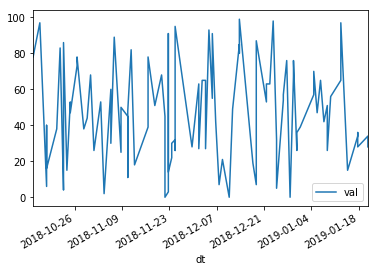

In [163]:
%pylab inline
a.plot(kind  = 'line', x = 'dt', y = 'val')

In [164]:
a['dt'].dt.date.head()

0    2018-11-22
1    2018-10-15
2    2018-11-22
3    2018-11-29
4    2018-12-21
Name: dt, dtype: object

In [165]:
a['day'] = a['dt'].dt.day

In [168]:
a = a.sort_values('day')

Populating the interactive namespace from numpy and matplotlib


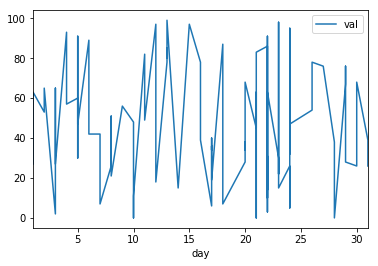

In [169]:
%pylab inline
#a = a.sort_values('day')
a.plot(kind  = 'line', x = 'day', y = 'val')

## 建立虛擬變量

In [171]:
df2 = df.head(10)

In [174]:
df2 = df2[['title', 'building_use']]

In [177]:
newvar = pandas.get_dummies(df2['building_use'])

In [181]:
pandas.concat([df2, newvar], axis = 1)

,title,building_use,透天厝/分租套房,透天厝/獨立套房,透天厝/雅房,電梯大樓/分租套房,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/雅房
0,套房出租-近東方學院(六~八月可入住),透天厝/獨立套房,0,1,0,0,0,0,0
1,好房子【聰明的你、妳快來租吧】,透天厝/獨立套房,0,1,0,0,0,0,0
2,陽台大套房(獨立洗衣機)近頂溪捷運站,電梯大樓/分租套房,0,0,0,1,0,0,0
3,火車站附近~~優質套房,透天厝/獨立套房,0,1,0,0,0,0,0
4,觀音四維路優質陽台套房,透天厝/分租套房,1,0,0,0,0,0,0
5,近捷運，採光佳，有景觀，全新家電裝潢,電梯大樓/整層住家,0,0,0,0,1,0,0
6,近明新、台元/全新完工/飯店式電梯套房,電梯大樓/雅房,0,0,0,0,0,0,1
7,附網路電視包水費!離逢甲商圈近,透天厝/雅房,0,0,1,0,0,0,0
8,逢甲大學-有陽台的套房(獨立水電錶),電梯大樓/獨立套房,0,0,0,0,0,1,0
9,大衛營優質社區管理好，交通便利、裝潢佳,電梯大樓/整層住家,0,0,0,0,1,0,0


In [183]:
df['price'] = df['price'].map(lambda e: int(e.replace('元/月', '').replace(',', '')))

In [185]:
df['search_date'] = pandas.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [187]:
df2 = df.pivot_table(index='search_date', columns='building_use', values='price', aggfunc=sum)
df2.head()


building_use,倉庫/其他,公寓/住辦,公寓/其他,公寓/分租套房,公寓/店面,公寓/整層住家,公寓/獨立套房,公寓/辦公,公寓/雅房,其他/其他,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
search_date,,,,,,,,,,,,,,,,,,,,,
2017-05-08,72325.0,371500.0,58500.0,1224399.0,4490600.0,4241986.0,2321837.0,1173780.0,401067.0,6000.0,...,121000.0,203499.0,1110800.0,177814.0,453899.0,10574484.0,31536697.0,5276459.0,21835522.0,105900.0
2017-05-09,236744.0,159000.0,42999.0,1579138.0,3362400.0,4206235.0,3048561.0,855900.0,366199.0,NaN,...,392000.0,178000.0,968399.0,579000.0,408299.0,6219799.0,30583975.0,6233755.0,28541573.0,129700.0
2017-05-10,63748.0,494800.0,NaN,2035480.0,7132600.0,5572385.0,5193507.0,1165900.0,493833.0,NaN,...,646800.0,236900.0,1840888.0,825934.0,748549.0,31005928.0,53833067.0,9925236.0,60122996.0,227300.0
2017-05-11,108200.0,242600.0,11000.0,1643348.0,4824099.0,5068078.0,3147599.0,464000.0,583450.0,3500.0,...,314700.0,405470.0,1219550.0,3648149.0,800399.0,12785298.0,46318253.0,7419697.0,29084108.0,229480.0
2017-05-12,60800.0,1096300.0,75000.0,4318694.0,10924080.0,7866946.0,9554327.0,2882900.0,1069600.0,NaN,...,795300.0,608850.0,4139359.0,734820.0,1517399.0,30397667.0,45193426.0,15130740.0,88289435.0,464600.0


In [188]:
df3 = df.pivot_table(index='building_use', columns='search_date', values='price', aggfunc=sum)
df3.head()


search_date,2017-05-08 00:00:00,2017-05-09 00:00:00,2017-05-10 00:00:00,2017-05-11 00:00:00,2017-05-12 00:00:00,2017-05-13 00:00:00,2017-05-14 00:00:00,2017-05-15 00:00:00
building_use,,,,,,,,
倉庫/其他,72325.0,236744.0,63748.0,108200.0,60800.0,231348.0,590250.0,NaN
公寓/住辦,371500.0,159000.0,494800.0,242600.0,1096300.0,1600499.0,1487800.0,421500.0
公寓/其他,58500.0,42999.0,NaN,11000.0,75000.0,234300.0,143000.0,NaN
公寓/分租套房,1224399.0,1579138.0,2035480.0,1643348.0,4318694.0,6571657.0,5744947.0,14800.0
公寓/店面,4490600.0,3362400.0,7132600.0,4824099.0,10924080.0,24972598.0,20999686.0,4686200.0


In [192]:
df['btype'] = df['building_use'].map(lambda e: str(e).split('/')[0])

In [196]:
df['buse'] = df['building_use'].map(lambda e: str(e).split('/')[1] if len(str(e).split('/')) > 1 else e)

In [198]:
df_multi_idx = df.pivot_table(index=['btype', 'buse'], columns='search_date', values='price', aggfunc=sum) 


In [200]:
df_multi_idx.head()

search_date  2017-05-08  2017-05-09  2017-05-10  2017-05-11  2017-05-12  \
btype buse                                                                
倉庫    其他        72325.0    236744.0     63748.0    108200.0     60800.0   
公寓    住辦       371500.0    159000.0    494800.0    242600.0   1096300.0   
      其他        58500.0     42999.0         NaN     11000.0     75000.0   
      分租套房    1224399.0   1579138.0   2035480.0   1643348.0   4318694.0   
      店面      4490600.0   3362400.0   7132600.0   4824099.0  10924080.0   

search_date  2017-05-13  2017-05-14  2017-05-15  
btype buse                                       
倉庫    其他       231348.0    590250.0         NaN  
公寓    住辦      1600499.0   1487800.0    421500.0  
      其他       234300.0    143000.0         NaN  
      分租套房    6571657.0   5744947.0     14800.0  
      店面     24972598.0  20999686.0   4686200.0

In [201]:
df_wide = df_multi_idx.unstack()

In [202]:
df_wide

search_date 2017-05-08                                               \
buse                住辦        其他       分租套房          店面        整層住家   
btype                                                                 
倉庫                 NaN   72325.0        NaN         NaN         NaN   
公寓            371500.0   58500.0  1224399.0   4490600.0   4241986.0   
其他                 NaN    6000.0        NaN         NaN         NaN   
別墅             60000.0   27000.0    35800.0     70000.0   1743000.0   
廠房                 NaN  116000.0        NaN         NaN         NaN   
廠辦                 NaN       NaN        NaN         NaN         NaN   
透天厝           465000.0   53500.0   645234.0   5864299.0   2312098.0   
電梯大樓         1110800.0  177814.0   453899.0  10574484.0  31536697.0   

search_date                                  2017-05-09             ...     \
buse              獨立套房          辦公        雅房         住辦        其他   ...      
btype                                                               ...      
倉庫                 NaN         NaN       NaN        NaN  236744.0   ...      
公寓           2321837.0   1173780.0  401067.0   159000.0   42999.0   ...      
其他                 NaN         NaN       NaN        NaN       NaN   ...      
別墅            149348.0         NaN    4000.0        NaN  114800.0   ...      
廠房                 NaN         NaN       NaN        NaN   45000.0   ...      
廠辦                 NaN         NaN       NaN        NaN       NaN   ...      
透天厝          2840144.0    121000.0  203499.0   125000.0  158000.0   ...      
電梯大樓         5276459.0  21835522.0  105900.0   968399.0  579000.0   ...      

search_date   2017-05-14            2017-05-15                                \
buse                  辦公         雅房         住辦       其他     分租套房          店面   
btype                                                                          
倉庫                   NaN        NaN        NaN      NaN      NaN         NaN   
公寓             1332610.0  2324022.0   421500.0      NaN  14800.0   4686200.0   
其他                   NaN        NaN        NaN      NaN      NaN         NaN   
別墅                   NaN    68480.0   139800.0      NaN   7500.0    155000.0   
廠房                   NaN        NaN        NaN      NaN      NaN         NaN   
廠辦                   NaN        NaN        NaN      NaN      NaN         NaN   
透天厝            1590700.0  1399476.0  1139500.0  48000.0  38499.0  13426988.0   
電梯大樓         119616166.0   868095.0  2786000.0      NaN   5000.0  17015807.0   

search_date                                           
buse             整層住家      獨立套房          辦公       雅房  
btype                                                 
倉庫                NaN       NaN         NaN      NaN  
公寓           194800.0   65800.0    980994.0  10400.0  
其他                NaN       NaN         NaN      NaN  
別墅           351000.0    9900.0         NaN      NaN  
廠房                NaN       NaN         NaN      NaN  
廠辦                NaN       NaN         NaN      NaN  
透天厝           59000.0  146000.0    699900.0  34800.0  
電梯大樓         763800.0  131800.0  45455998.0   5000.0  

[8 rows x 64 columns]

In [203]:
df_long = df_wide.stack()
df_long.head()


search_date  2017-05-08  2017-05-09  2017-05-10  2017-05-11  2017-05-12  \
btype buse                                                                
倉庫    其他        72325.0    236744.0     63748.0    108200.0     60800.0   
公寓    住辦       371500.0    159000.0    494800.0    242600.0   1096300.0   
      其他        58500.0     42999.0         NaN     11000.0     75000.0   
      分租套房    1224399.0   1579138.0   2035480.0   1643348.0   4318694.0   
      店面      4490600.0   3362400.0   7132600.0   4824099.0  10924080.0   

search_date  2017-05-13  2017-05-14  2017-05-15  
btype buse                                       
倉庫    其他       231348.0    590250.0         NaN  
公寓    住辦      1600499.0   1487800.0    421500.0  
      其他       234300.0    143000.0         NaN  
      分租套房    6571657.0   5744947.0     14800.0  
      店面     24972598.0  20999686.0   4686200.0

## 正規表達法

In [204]:
a = 'my phone number is 0912345678'
'0912345678' in  a

True

In [205]:
'0922333555' in  a

False

In [206]:
import re

In [207]:
n = '3'
re.search('3', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [208]:
# [] : match any character within []
re.search('[0123456789]', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [210]:
# - : continuous
# [0123456789] => [0-9]
re.search('[0-9]', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [211]:
# \d: match any digit
# [0-9] => \d
re.search('\d', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [212]:
s = 'w'
re.search('[abcdefghijklmnopqrstuvwxyz]', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [213]:
s = 'Z'
re.search('[abcdefghijklmnopqrstuvwxyz]', s)

In [214]:
s = 'Z'
re.search('[abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ]', s)

<_sre.SRE_Match object; span=(0, 1), match='Z'>

In [215]:
s = 'Z'
re.search('[a-zA-Z0-9]', s)

<_sre.SRE_Match object; span=(0, 1), match='Z'>

In [216]:
# \w: match any digit and alphabet
# [a-zA-Z0-9] => \w
re.search('\w', s)

<_sre.SRE_Match object; span=(0, 1), match='Z'>

In [232]:
# .: match any character
s = '!'
re.search('.', s)

<_sre.SRE_Match object; span=(0, 1), match='!'>

In [217]:
s = 'apple'
re.search('\w', s)

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [218]:
# {n} => match exact n characters
s = 'apple'
re.search('\w{5}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [219]:
re.search('\w{3}', s)

<_sre.SRE_Match object; span=(0, 3), match='app'>

In [220]:
# {m,n} : match at least m characters , at most n characters
re.search('\w{3,8}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [221]:
# {m,} # match at least m characters
re.search('\w{3,}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [223]:
# {1,} # match at least 1 characters
# {1,} => +
re.search('\w+', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [224]:
# {0,} # match at least 0 characters
# {0,} => *
re.search('\w*', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [229]:
phones = ['0912345678', '0912-345-678', '0912-345678', '0912830128392389218983908902380438403']
for p in phones:
    #print(re.search('09\d{8}', p))
    #print(re.search('09\d{2}-{0,1}\d{3}-{0,1}\d{3}', p))
    
    #? => {0,1}
    #print(re.search('09\d{2}-?\d{3}-?\d{3}', p))
    
    # ^: match the begining, $: match the end
    print(re.search('^09\d{2}-?\d{3}-?\d{3}$', p))
    

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
None


In [236]:
s = 'I am a super star'
m = re.search('(.*)s(.*)', s)
m.groups()

('I am a super ', 'tar')

In [237]:
s = 'I am a super star'
m = re.search('(.*?)s(.*)', s)
m.groups()

('I am a ', 'uper star')

In [238]:
import re 
m = re.match(r"(\w+)@(\w+)", "david@largidata.com") 
print(m.groups())


('david', 'largidata')


In [239]:
m.group(1)

'david'

In [240]:
m.group(2)

'largidata'

In [241]:
import re 
m = re.match(r"(\w+)@([\w.]+)", "david@largidata.com") 
print(m.groups())


('david', 'largidata.com')


In [242]:
m = re.match(r"(\d+)\.(\d+)", "1999.5") 
print(m.groups())


('1999', '5')


In [243]:
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "David Chiu") 
print(m.group('first_name'), m.group('last_name'))
 


David Chiu


In [247]:
str1 = 'scp file.txt root@10.0.0.1:./' 
m=re.search('^scpa ([\w\.]+) (\w+)@([\w\.]+):(.+)',str1) 
if m: 
    print(m.group(1), m.group(2), m.group(3), m.group(4))


In [248]:
import requests
res = requests.get('https://www.ptt.cc/man/STDM-87-302/D75C/M.1123268171.A.23F.html')

In [251]:
import re
m = re.findall('09\d{8}',res.text)

In [257]:
a = '''
陳，林，黃，張，李，王，吳，劉，蔡，楊，
許，鄭，謝，郭，洪，曾，邱，廖，賴，周，
徐，蘇，葉，莊，呂，江，何，蕭，羅，高，
簡，朱，鍾，施，游，詹，沈，彭，胡，余，
盧，潘，顏，梁，趙，柯，翁，魏，方，孫，
張簡，戴，范，歐陽，宋，鄧，杜，侯，曹，薛，
傅，丁，溫，紀，范姜，蔣，歐，藍，連，唐，
馬，董，石，卓，程，姚，康，馮，古，姜，
湯，汪，白，田，涂，鄒，巫，尤，鐘，龔，
嚴，韓，黎，阮，袁，童，陸，金，錢，邵
'''

''.join([e.strip() for e in a.split('，')])

'陳林黃張李王吳劉蔡楊許鄭謝郭洪曾邱廖賴周徐蘇葉莊呂江何蕭羅高簡朱鍾施游詹沈彭胡余盧潘顏梁趙柯翁魏方孫張簡戴范歐陽宋鄧杜侯曹薛傅丁溫紀范姜蔣歐藍連唐馬董石卓程姚康馮古姜湯汪白田涂鄒巫尤鐘龔嚴韓黎阮袁童陸金錢邵'

In [260]:
m = re.findall('[陳林黃張李王吳劉蔡楊許鄭謝郭洪曾邱廖賴周徐蘇葉莊呂江何蕭羅高簡朱鍾施游詹沈彭胡余盧潘顏梁趙柯翁魏方孫張簡戴范歐陽宋鄧杜侯曹薛傅丁溫紀范姜蔣歐藍連唐馬董石卓程姚康馮古姜湯汪白田涂鄒巫尤鐘龔嚴韓黎阮袁童陸金錢邵][\u4e00-\u9fa5]{2,3}', res.text)

In [264]:
df[['room', 'living_room', 'bathroom', 'balcony']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛(\d+)陽臺')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [278]:
df['address'].head(25)

0        高雄市湖內區民生街
1        新北市蘆洲區長安街
2      新北市永和區中山路一段
3        屏東縣潮州鎮六合路
4        桃園市觀音區四維路
5        新北市淡水區民族路
6      新竹縣新豐鄉康樂路一段
7      台中市西屯區西屯路二段
8        台中市西屯區至善路
9       基隆市安樂區樂利三街
10        新竹市東區明湖路
11     台北市文山區指南路二段
12     台中市北屯區瀋陽路三段
13       嘉義市西區興業西路
14       新北市新店區寶橋路
15       台北市北投區新民路
16    新北市淡水區中正東路一段
17       桃園市楊梅區蘋果路
18        嘉義市東區學府路
19       台東縣台東市豐盛路
20       台北市松山區北寧路
21       彰化縣彰化市民族路
22       桃園市桃園區大有路
23       台中市后里區民生路
24       新竹縣新豐鄉松林村
Name: address, dtype: object

In [290]:
df[['city', 'county', 'road']] = df['address'].str.extract('(.+[市縣])(.+[區鎮鄉市])(.+[路段街村巷里道寮])')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [291]:
df['city'].count()

69938

In [295]:
df['city'].isnull().sum()

377

In [296]:
872 / 69443

0.012557061186872687

In [298]:
df.loc[df['city'].isnull(), 'address'].head()

657       苗栗縣頭份市蟠桃
1069      台南市安定區中榮
1126      新北市淡水區崁頂
1555    嘉義縣太保市頂港子墘
1562     苗栗縣竹南鎮五谷王
Name: address, dtype: object

In [305]:
agg = df.groupby(['city', 'btype', 'buse'])['price'].median()

In [310]:
agg2 = agg.reset_index()

In [311]:
agg2[agg2['city'] == '台北市']

,city,btype,buse,price
58,台北市,倉庫,其他,4560.0
59,台北市,公寓,住辦,29000.0
60,台北市,公寓,其他,27500.0
61,台北市,公寓,分租套房,10000.0
62,台北市,公寓,店面,58000.0
63,台北市,公寓,整層住家,26000.0
64,台北市,公寓,獨立套房,11000.0
65,台北市,公寓,辦公,32499.5
66,台北市,公寓,雅房,6500.0
67,台北市,別墅,住辦,415000.0
